In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.neural_network import MLPClassifier

In [2]:
dataSrc = pd.read_excel('../datasets/Credit card/default of credit card clients.xlsx', header=1)
#dataset source = https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [3]:
dataSrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
X = dataSrc.drop(axis=1, columns=['default payment next month'])
Y = dataSrc['default payment next month']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 1. Decision tree

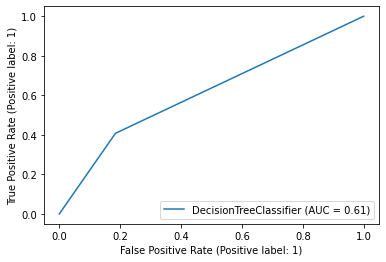

In [6]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
plot_roc_curve(dt, X_test, Y_test)

## 2. SVM Linear

/home/rbury/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


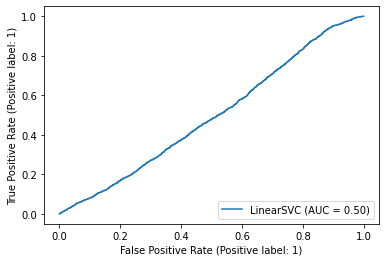

In [8]:
svmLinear = svm.LinearSVC()
svmLinear.fit(X_train, Y_train)
plot_roc_curve(svmLinear, X_test, Y_test)

## 3. SVM Non-linear

### a. RBF

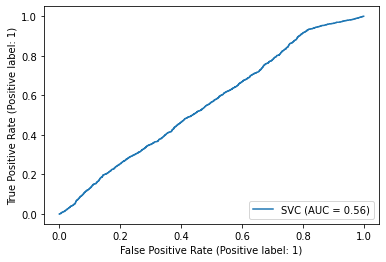

In [9]:
svmRBF = svm.SVC(kernel='rbf')
svmRBF.fit(X_train, Y_train)
plot_roc_curve(svmRBF, X_test, Y_test)

### b. Sigmoid

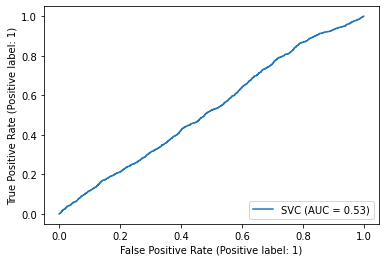

In [10]:
svmPoly = svm.SVC(kernel='sigmoid')
svmPoly.fit(X_train, Y_train)
plot_roc_curve(svmPoly, X_test, Y_test)

## 4. Neural Network

/home/rbury/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


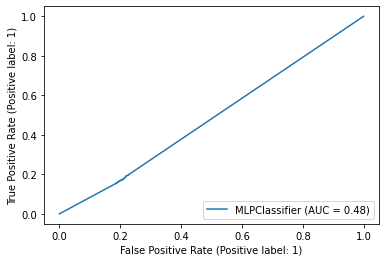

In [24]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,2), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)

/home/rbury/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


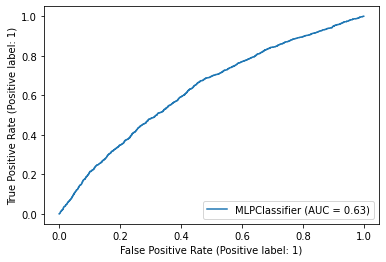

In [35]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)